In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv')
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [ ]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [ ]:
df.rename(columns={'Month':'ds','Sales':'y'}, inplace= True)
df

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      108 non-null    datetime64[ns]
 1   y       108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


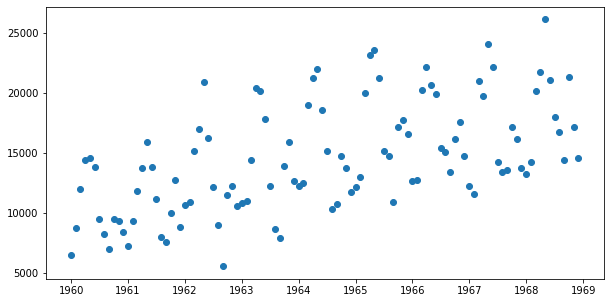

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(df['ds'],df['y'])

In [ ]:
import fbprophet
model = fbprophet.Prophet(changepoint_prior_scale=1)
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model.make_future_dataframe(periods = 17, freq='M')#as 500 days becomes 16.5 months thus rounede up to 17
forecast = model.predict(forecast)

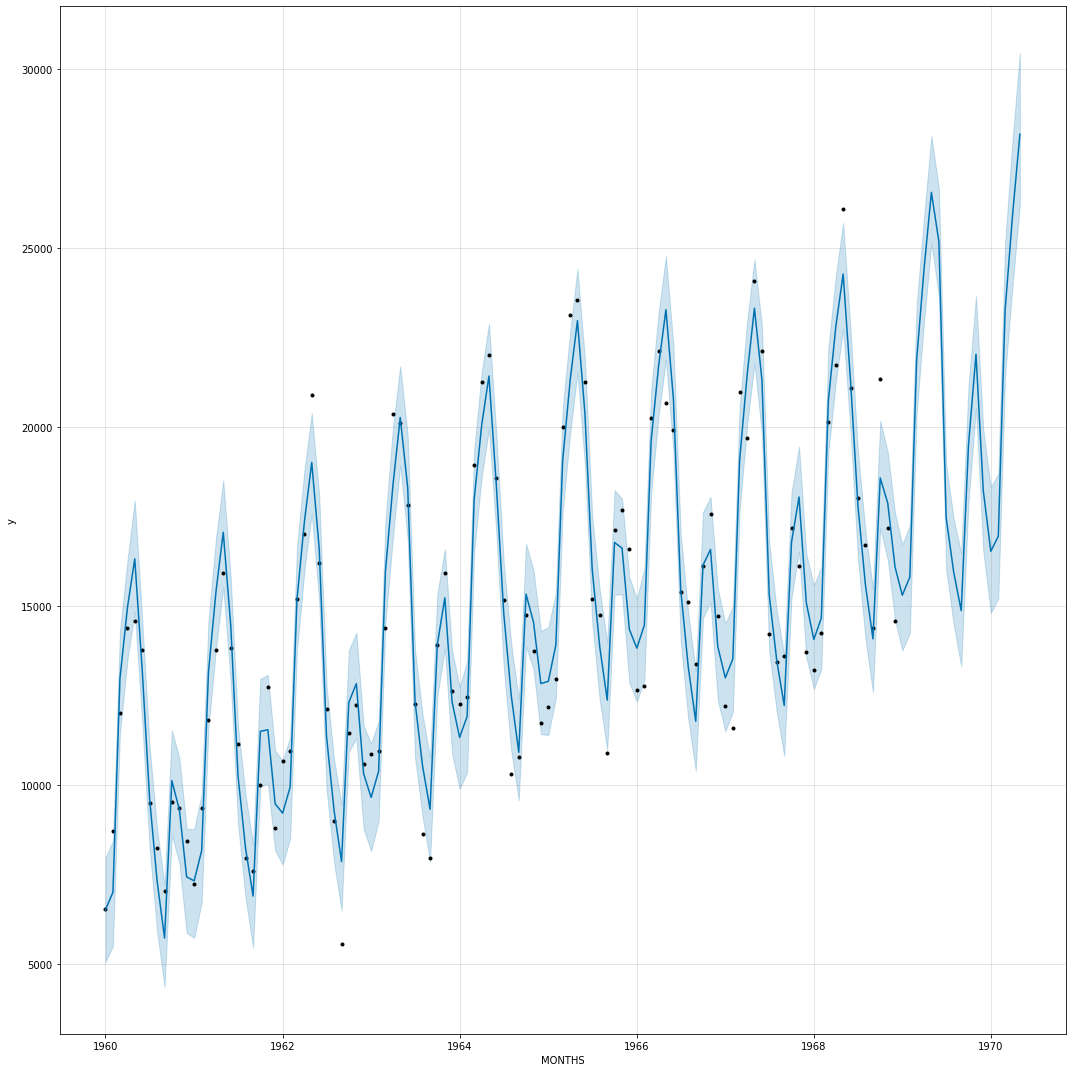

In [ ]:
model.plot(forecast,xlabel = 'MONTHS',ylabel = 'y', figsize=(15,15))
plt.show()